In [1]:
import matplotlib.pyplot as plt
import imp
import numpy as np
import xarray
import tensorflow as tf
import tensorflow.keras.backend as K
import enso
from sklearn.ensemble import RandomForestRegressor

In [2]:
imp.reload(enso);
np.random.seed(0);

In [16]:
def create_ts(length, period):
    t = np.arange(length) + np.random.rand(1)
    noise = np.random.normal(0, 0.2, length)
    return np.cos(2 * np.pi * t / period) + noise + np.cos(np.pi * t / 60)

In [17]:
length = 12 * 500
T = 12
H = 4

Testing functionality of enso module on simple signal:

In [18]:
sig = create_ts(length, 12)
clm = enso.climatology(sig)
anm = enso.anomaly(sig, clm)
oni = enso.ONI(anm)
oni_norm = enso.normalize(oni)

In [19]:
eps = 0.0001
if(np.abs(np.mean(oni_norm)) < eps and np.abs(np.std(oni_norm) - 1) < eps):
    verdict = "CORRECT!"
else:
    verdict = "INCORRECT!"
print("TEST: Mean and std of normalized signal:", np.mean(oni_norm), np.std(oni_norm), "......", verdict)

TEST: Mean and std of normalized signal: 7.105427357601002e-18 1.0 ...... CORRECT!


Vizualizing the original signal, the anomaly and the oni of the anomaly for a specified section:

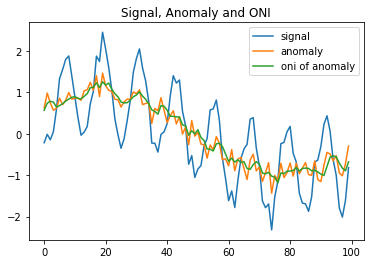

In [24]:
section = range(100, 200)
plt.plot(sig[section], label = "signal");
plt.plot(anm[section], label = "anomaly");
plt.plot(oni[section], label = "oni of anomaly");
plt.title("Signal, Anomaly and ONI");
plt.legend();

Vizualizing the climatology:

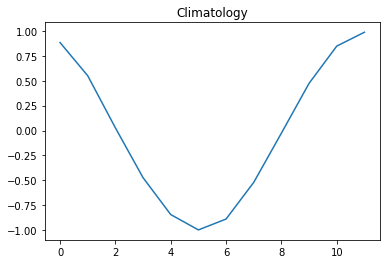

In [23]:
plt.plot(clm);
plt.title("Climatology");

Testing functionality of enso module on nino34:

In [29]:
datapath = '~/nino34_monthly.nc'
nino34 = xarray.open_dataset(datapath, decode_times = False)
nino34 = np.array((nino34['nino34'].values)[12 * 50:])

In [30]:
sig = nino34
clm = enso.climatology(sig)
anm = enso.anomaly(sig, clm)
oni = enso.ONI(anm)
oni_norm = enso.normalize(oni)

In [31]:
eps = 0.0001
if(np.abs(np.mean(oni_norm)) < eps and np.abs(np.std(oni_norm) - 1) < eps):
    verdict = "CORRECT!"
else:
    verdict = "INCORRECT!"
print("TEST: Mean and std of normalized signal:", np.mean(oni_norm), np.std(oni_norm), "......", verdict)

TEST: Mean and std of normalized signal: 7.894919286223335e-18 0.9999999999999999 ...... CORRECT!


Vizualizing the original signal, the anomaly and the oni of the anomaly for a specified section:

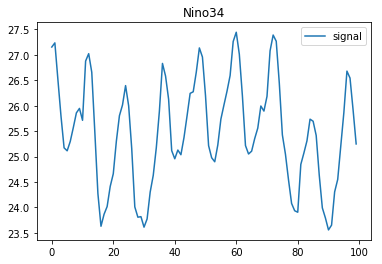

In [34]:
section = range(100, 200)
plt.plot(sig[section], label = "signal");
plt.title("Nino34");
plt.legend();

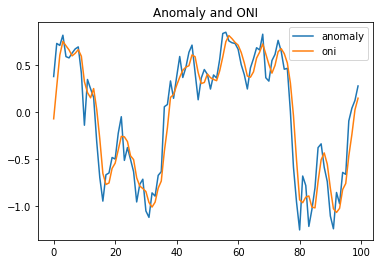

In [35]:
plt.plot(anm[section], label = "anomaly");
plt.plot(oni[section], label = "oni");
plt.title("Anomaly and ONI");
plt.legend();

Vizualizing the climatology:

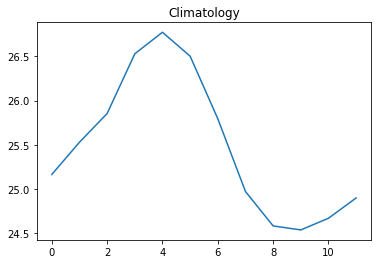

In [36]:
plt.plot(clm);
plt.title("Climatology");